In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
License(s): ODbL-1.0
100% 119M/119M [00:06<00:00, 20.3MB/s]
100% 119M/119M [00:06<00:00, 19.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-ctscan-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.utils import image_dataset_from_directory
from keras.applications.vgg16 import VGG16

In [5]:
train = image_dataset_from_directory(
    directory = '/content/Data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation = image_dataset_from_directory(
    directory = '/content/Data/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [6]:
def process(image, label):
  image = tensorflow.cast(image/255., tensorflow.float32)
  return (image, label)

train = train.map(process)
validation_ds =  validation.map(process)

In [7]:
base = VGG16(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
base.trainable = False

model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
model.fit(train, epochs=10, validation_data = validation)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4759 - loss: 1.6975 - val_accuracy: 0.3750 - val_loss: 108.8613
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.7505 - loss: 0.5588 - val_accuracy: 0.4028 - val_loss: 113.5212
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8904 - loss: 0.2749 - val_accuracy: 0.4028 - val_loss: 137.1529
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9706 - loss: 0.1213 - val_accuracy: 0.4167 - val_loss: 125.1094
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.9912 - loss: 0.0579 - val_accuracy: 0.4167 - val_loss: 135.1299
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.9936 - loss: 0.0391 - val_accuracy: 0.4167 - val_loss: 128.0604
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.9997 - loss: 0.0212 - val_accuracy: 0.4444 - val_loss: 128.0095
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.9998 - loss: 0.0087 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


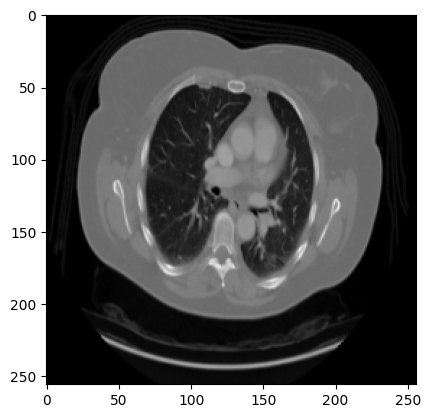

Adenocarcinoma
Predicted class: 0


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img = cv2.imread('/content/Data/test/adenocarcinoma/000109 (2).png')
img = cv2.resize(img, (256, 256))

# Correct the shape
img = img.reshape((1, 256, 256, 3))  # Add batch dimension

# Normalize the image
img = img.astype('float32') / 255.0

# Make a prediction
prediction = model.predict(img)

# Print the predicted class
predicted_class = np.argmax(prediction, axis=1)
plt.imshow(img[0])
plt.show()

if predicted_class[0] == 0:
  print('Adenocarcinoma')
elif predicted_class[0] == 1:
  print('Large.cell.carcinoma')
elif predicted_class[0] == 2:
  print('normal')
elif predicted_class[0] == 3:
  print('Squamous Cell Carcinoma')
print(f"Predicted class: {predicted_class[0]}")